In [3]:
# importing required packages

%matplotlib inline
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')

import IPython
import csv
import pandas as pd

import matplotlib #scientific plots
import matplotlib.pyplot as plt

import numpy as np # numerical programming

import sklearn #scikit-learn
import math #Mathematical functions
import pylab 
import time
import pprint as pp
from mpl_toolkits.mplot3d import Axes3D #we use this to plot 3d
from matplotlib.ticker import NullFormatter #No labels on the ticks.
from IPython.display import Image
from __future__ import division

Now we will import the data. Here I am using pandas to import data and I will aslo display some data.

In [4]:
#number of rows and columns to display
#pd.options.display.max_rows = 400
#pd.options.display.max_columns = 30
#reading data from csv file using pandas
collected_data = pd.read_csv('SFE Data.csv', delimiter =',',index_col = None, header = 0)
#collected_data.shape #to check the size of data
collected_data.head(2) #gives two values of columns



,C,N,P,S,V,Ni,Nb,Al,Ti,Fe,...,Cr,Cu,DOI,url,SFE,Error,title,Author,temperature,experiment_type
0,0.004,0.003,0.025,0.001,0.0,15.6,0.0,0.0,0.0,64.317,...,17.5,0.0,10.1007/s11661-013-1943-0,http://link.springer.com/article/10.1007/s1166...,51.6,0.014341,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300,TEM - WBDF
1,0.020,0.009,0.022,0.001,0.0,15.6,0.0,0.0,0.0,64.188,...,17.6,0.0,10.1007/s11661-013-1943-0,http://link.springer.com/article/10.1007/s1166...,54.6,0.023810,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300,TEM - WBDF


We are pre-processing the collected data.

In [5]:
#First we are reducing the collected data by considering the data which is done at room temperature 
#certain column selection name["1"] if twoname[["1",""]]
data_red1 = collected_data[(collected_data["temperature"]>290) & (collected_data["temperature"]<310)]
#data_roomtemp.shape
len(data_red1)

426

Now from room temperature data we will subset the data by considering experimental measurements 

In [6]:
data_red1["experiment_type"].unique()

array(['TEM - WBDF', 'XRD', 'TEM', 'Thermodynamic Modeling',
       'Synchrotron XRD', 'TEM-WBDF', 'Neutron Diffraction',
       'Literature Review', 'Literature review'], dtype=object)

In [7]:
data_red2=data_red1[(data_red1["experiment_type"]!="Thermodynamic Modeling")]
len(data_red2)

387

In [8]:
#dropping columns DOI and URL
#Alternative to specifying axis (labels, axis=1 is equivalent to columns=labels).
data_red2 = data_red2.drop(['DOI', 'url'], axis=1) 

data_red2.columns.values #display of column headers 

array(['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo',
       'Mn', 'Co', 'Si', 'Cr', 'Cu', 'SFE', 'Error', 'title', 'Author',
       'temperature', 'experiment_type'], dtype=object)

next only with ferrous alloys. the data from Unfried-Silgado, Jimy is only not ferrous alloys

In [9]:
data_red3=data_red2[(data_red2["Author"]!="Unfried-Silgado, Jimy")]
len(data_red3)

379

we are selecting only requried alloys because few alloys have very very less measurements.

In [10]:
alloys_header = data_red3[data_red3.columns[:17]]
#alloys_header.columns.values 

for i in alloys_header:
   print(i, len(alloys_header[alloys_header[i]> 0]) , len(alloys_header[alloys_header[i]> 0.05]))



C 339 98
N 248 85
P 170 7
S 170 1
V 0 0
Ni 300 300
Nb 2 2
Al 34 27
Ti 0 0
Fe 379 379
Hf 0 0
Mo 168 133
Mn 305 217
Co 3 3
Si 240 120
Cr 332 332
Cu 6 6


In [11]:
#if we check p s only few elements are more than 0.05 its due substantial alloying additions 
#and not because of impurity or trace additions. so this vcan be neglected
# we can also neglect v, ti, hf since there are zero. but we will display p,s, nb, co, cu to see if we can remove them
#alloys_header1 = ['P','S','Nb','Co','Cu']
alloys_header1 = alloys_header[['P','S','Nb','Co','Cu']]

for m in alloys_header1:
   print(m, alloys_header1[alloys_header1[m]> 0.05] )


P          P      S   Nb   Co   Cu
65   0.071  0.033  0.0  0.0  0.0
66   0.063  0.030  0.0  0.0  0.0
214  0.080  0.040  0.0  0.0  0.0
215  0.080  0.040  0.0  0.0  0.0
216  0.080  0.040  0.0  0.0  0.0
217  0.080  0.040  0.0  0.0  0.0
218  0.080  0.040  0.0  0.0  0.0
S          P     S   Nb   Co   Cu
156  0.012  0.06  0.0  0.0  0.0
Nb        P    S    Nb   Co   Cu
351  0.0  0.0  1.00  0.0  0.0
353  0.0  0.0  0.52  0.0  0.0
Co         P      S   Nb     Co   Cu
256  0.00  0.000  0.0   6.42  0.0
335  0.01  0.014  0.0  20.20  0.0
339  0.00  0.000  0.0   9.55  0.0
Cu        P    S   Nb   Co    Cu
117  0.0  0.0  0.0  0.0  0.23
132  0.0  0.0  0.0  0.0  0.23
237  0.0  0.0  0.0  0.0  0.37
238  0.0  0.0  0.0  0.0  0.22
239  0.0  0.0  0.0  0.0  0.14
257  0.0  0.0  0.0  0.0  5.20


the next is subset of data_red3 which have enough datapoints from 9 chosen elements

In [12]:
data_red4 = data_red3[(data_red3.Nb< 1) & (data_red3.Co< 1) & (data_red3.Cu< 1)]
len(data_red4)

374

In next data set, we will have drop values which do not have enough data points

In [13]:
data_red4 = data_red4.drop(['P','S',"V",'Nb','Co',"Ti","Hf",'Cu'], axis=1)
#print(data_red4.columns.values)
#len(data_red4.columns.values)
data_red4.shape

(374, 15)

we are converting the data into arrays, so we can work with numpy

In [14]:
#On applying the .reset_index() function, the index gets shifted to the dataframe as a separate column. It is named as index. 
#The new index of the dataframe is now integers ranging from 0 to the length of the dataframe.
first_array = data_red4.reset_index().values
print(first_array.shape)
first_array[0,:]
np.savetxt('data_want.csv', first_array[:,0:12], delimiter=',')


(374, 16)


In [15]:
SFE_data = first_array[:,0:12]
SFE_data = np.array(SFE_data, dtype='float')
#SFE-(1-error),each rows
lower = SFE_data[:,10]*(1 - SFE_data[:,11]) 
higher = SFE_data[:,10]*(1 + SFE_data[:,11])
lowhigh = np.column_stack((lower,higher))


In [16]:
SFE_data = np.column_stack((SFE_data,lowhigh))
print(SFE_data.shape)
print(SFE_data[0,:])

(374, 14)
[0.0000000e+00 4.0000000e-03 3.0000000e-03 1.5600000e+01 0.0000000e+00
 6.4317000e+01 2.5000000e+00 3.0000000e-02 2.0000000e-02 1.7500000e+01
 5.1600000e+01 1.4341085e-02 5.0860000e+01 5.2340000e+01]


now we will construct three ‘‘classes’’ of SFE ranges or three regimes and will map
all our SFE numerical data to categorical data.
High - SFE > 45 mJ/m2 - martensitic transformation of TRIP-like behavior
Medium -  - 20 mJ/m2 < SFE < 45 mJ/m2 - deformation twinning leading
Low - SFE< 20 mJ/m2 - deforms majorly by slip

In [17]:
SFE_classes = np.zeros(SFE_data.shape[0])

SFE_classes[SFE_data[:,10] <= 20] = 0
SFE_classes[(SFE_data[:,10] > 20) & (SFE_data[:,10] <= 45)] = 1
SFE_classes[(SFE_data[:,10] > 45)] = 2

#check number of entries for each class 
print((SFE_classes == 0).sum())
print((SFE_classes == 1).sum())
print((SFE_classes == 2).sum())

#check if only the needed classes there
print((SFE_classes == 1).sum() + (SFE_classes == 2).sum() + (SFE_classes == 3).sum()) 
SFE_classes.shape
SFE_data.shape


77
209
88
297


(374, 14)

Data Visualization

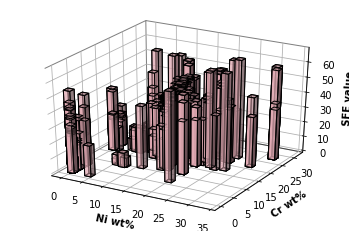

In [18]:
#now we will plot the data and see what we can visualize
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
Xpos=SFE_data[SFE_data[:,10]<70,3]
Ypos=SFE_data[SFE_data[:,10]<70,9]
Zpos=np.zeros(len(SFE_data[SFE_data[:,10]<70,10]))
dz=SFE_data[SFE_data[:,10]<70,10]
#print(len(Xpos))
#print(len(Ypos))
#ax.bar3d(x,y,z,dx,dy,dz,color, edgecolour, transpercy),breadth,width,height=vales of columns
ax.bar3d(Xpos,Ypos,Zpos,1.5,1.5,dz, edgecolor='black', color='pink', alpha=0.5)
#print(len(SFE_data[SFE_data[:,10]<70,10]))

ax.set_xlabel("Ni wt%", fontsize=10, fontweight='heavy')
#ax.set_xlim(35,0) # we can use this to show where x can with zero
# i choose the above limits after plotting image without limits and then adjusted axis
ax.set_ylabel("Cr wt%", fontsize=10, fontweight='heavy')
#ax.set_ylim(32,0)
ax.set_zlabel("SFE value", fontsize=10, fontweight='heavy')
#ax.set_zlim(0,60)
ax.xaxis.pane.set_edgecolor('black') #boders of axis, if not given it will be white
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.show()

above we took two elements(Ni and cr) and plotted. here we cannot decide anything just by SFE values, since it also depends on element values and each element have different values.
#increasing a certain element's value can lead to a certain behavior in SFE can't be applied.

Lets try to visualize each element with SFE

In [19]:
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [20]:
#we will plot variations of SFE values varying with different percentages
element_names = data_red4.columns.values[0:10]
print(element_names) #we are taking this because np array has no attribute 'columns'

['C' 'N' 'Ni' 'Al' 'Fe' 'Mo' 'Mn' 'Si' 'Cr' 'SFE']


<Figure size 360x360 with 0 Axes>

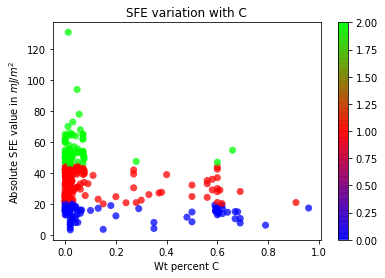

<Figure size 360x360 with 0 Axes>

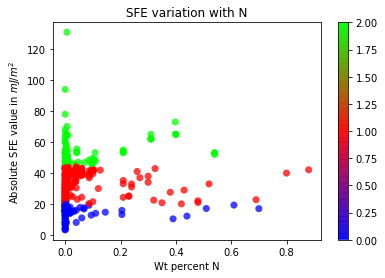

<Figure size 360x360 with 0 Axes>

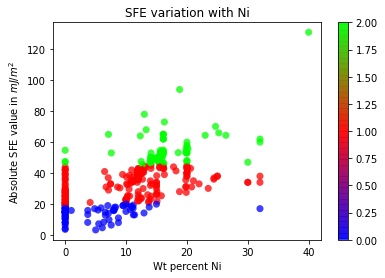

<Figure size 360x360 with 0 Axes>

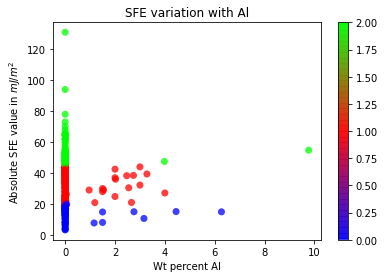

<Figure size 360x360 with 0 Axes>

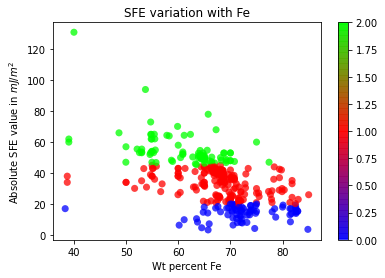

<Figure size 360x360 with 0 Axes>

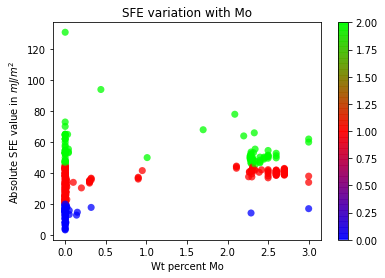

<Figure size 360x360 with 0 Axes>

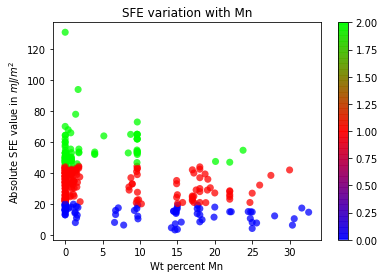

<Figure size 360x360 with 0 Axes>

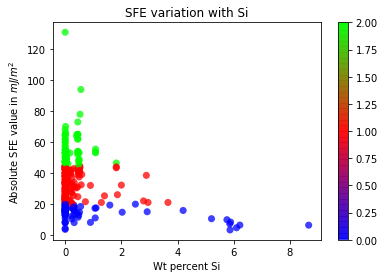

<Figure size 360x360 with 0 Axes>

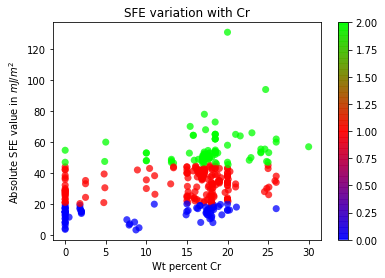

In [21]:
for i in range(1,10):
    fig = plt.figure(figsize=(5,5))
    fig, ax = plt.subplots()
    brg=ax.scatter(SFE_data[:,i],SFE_data[:,10],c=SFE_classes,marker="o", s=50, edgecolor='',cmap ='brg', alpha=0.75)
    ax.set_xlabel("Wt percent %s"%element_names[i-1])
    ax.set_ylabel("Absolute SFE value in $mJ/m^2$")
    ax.set_title("SFE variation with %s"%element_names[i-1])
    #print(SFE_data[:,1])
    #print(SFE_data[:,10])
    fig.colorbar(brg)
    plt.show()

We can see the plots are non-linear. Each SFE classes have different wt percentages of elements, dont have one proper sequence.

now we will see variation of one element with other elements

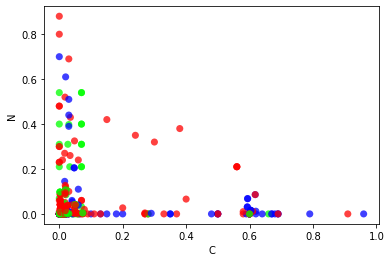

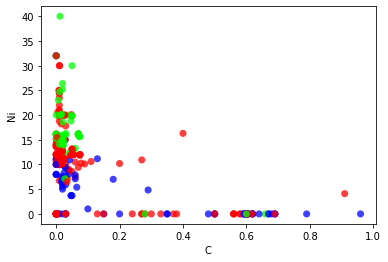

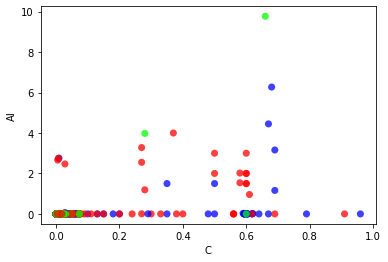

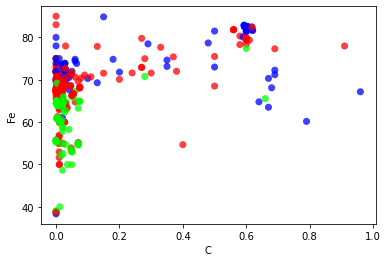

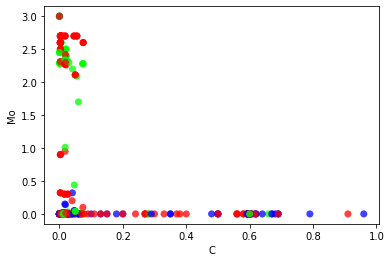

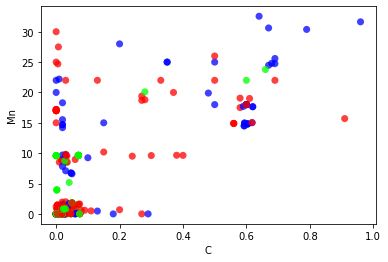

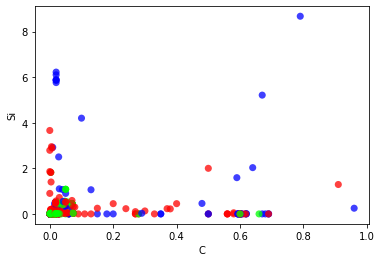

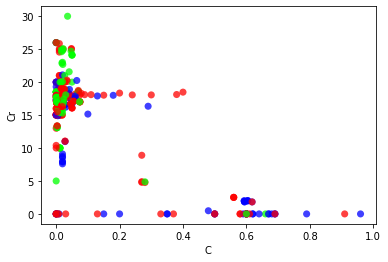

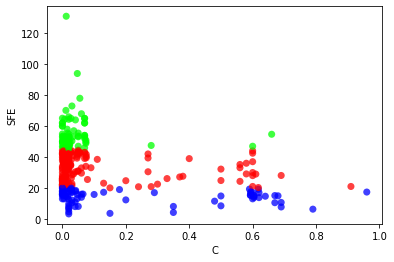

In [20]:
for i in range(2,11):
    #fig = plt.figure(figsize=(5,5))
    fig, ax = plt.subplots()
    ax.scatter(SFE_data[:,1],SFE_data[:,i],c=SFE_classes,marker="o", s=50, edgecolor='',cmap ='brg', alpha=0.75)
    ax.set_xlabel(element_names[0])
    ax.set_ylabel(element_names[i-1])
    #ax.set_title("SFE variation with %s"%element_names[i-1])
    #print(SFE_data[:,1])
    #print(SFE_data[:,10])
    plt.show()

There is no same sequence of C with other elements. 
The only thing we can observe is the high SFE classes are not present as C value increasing

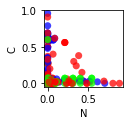

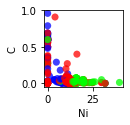

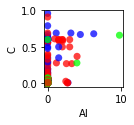

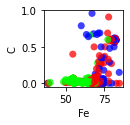

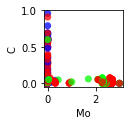

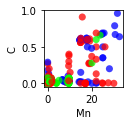

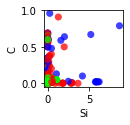

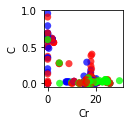

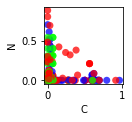

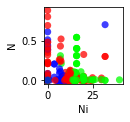

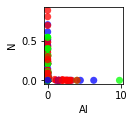

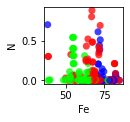

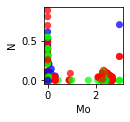

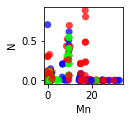

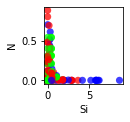

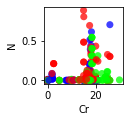

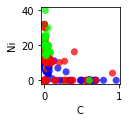

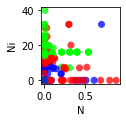

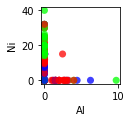

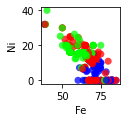

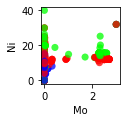

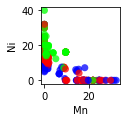

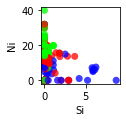

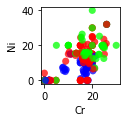

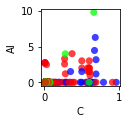

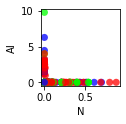

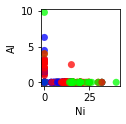

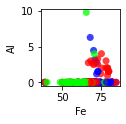

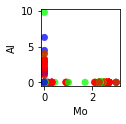

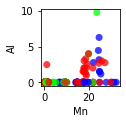

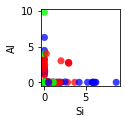

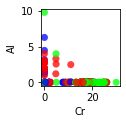

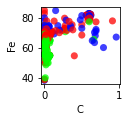

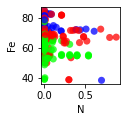

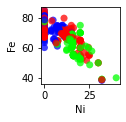

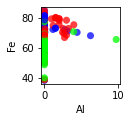

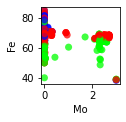

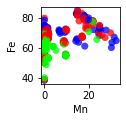

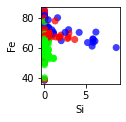

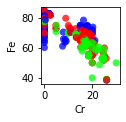

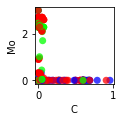

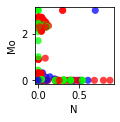

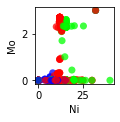

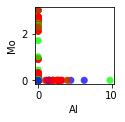

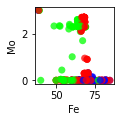

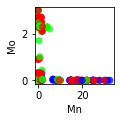

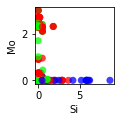

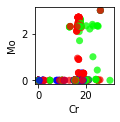

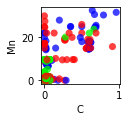

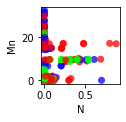

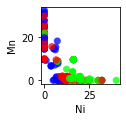

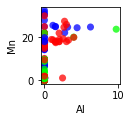

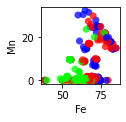

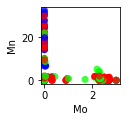

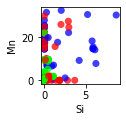

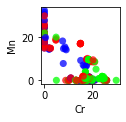

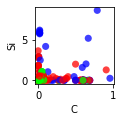

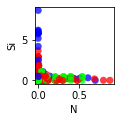

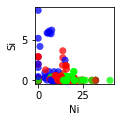

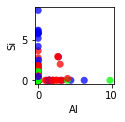

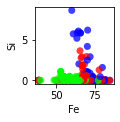

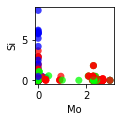

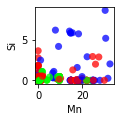

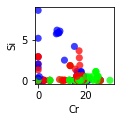

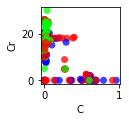

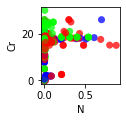

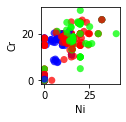

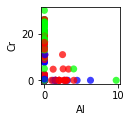

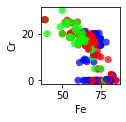

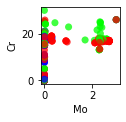

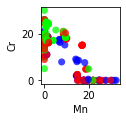

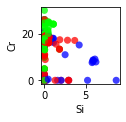

In [21]:
for i in range(1,10):
    for j in range(1,10):
        if (i!=j):
            fig = plt.figure(figsize=(15,15))
            ax = fig.add_subplot(len(SFE_data[1:10]),len(SFE_data[1:10]),(len(SFE_data[1:10])*(i-1))+j)
            ax.scatter(SFE_data[:,j],SFE_data[:,i],c=SFE_classes,marker="o", s=50, edgecolor='',cmap ='brg', alpha=0.75)
            ax.set_xlabel(element_names[j-1])
            ax.set_ylabel(element_names[i-1])
            plt.show()
    

even with the above plottings we can clearly say that the data is non-linear.

In [20]:
# # save to csv file
# np.savetxt('data_nor.csv', SFE_data[:,:10], delimiter=',')

# #normalization and standardization
# from sklearn import preprocessing
# #normalization = preprocessing.normalize(SFE_data[:,:10], axis=0)
# scaler = preprocessing.MinMaxScaler()
# normalization = scaler.fit_transform(SFE_data[:,:10])
# print(normalization[0])
# #print(normalization.shape)


# standardization = preprocessing.scale(SFE_data[:,:10], axis=0)


[0.         0.00416667 0.00340909 0.39       0.         0.55710921
 0.83333333 0.00092166 0.00230681 0.58333333]


Normalization

In [22]:
# import numpy as np
# # read csv file to np
data_SFE=np.genfromtxt('data_nor.csv',delimiter=',')
#print(data_SFE[0])
def dataset_MinMax(dataset):
	Min_Max = list()
	for i in range(len(dataset[0])):
		col_val = [row[i] for row in dataset]
		Min_val = min(col_val)
		Max_val = max(col_val)
		Min_Max.append([Min_val, Max_val])
	return Min_Max
 
# Rescaling, or min-max normalization:we scale the data into range: [0,1]
def normalization(dataset, Min_Max):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - Min_Max[i][0]) / (Min_Max[i][1] - Min_Max[i][0])
		
    
 
Min_Max = dataset_MinMax(data_SFE)
# Normalize columns
normalization(data_SFE, Min_Max)
#data_SFE = normalization elements

Dimensionality Reduction

We have 9 element compositions(predictor variables) and one SFE class(output variable).so we are using 10 dimensions to visualize everything going on.

So, the dimensionality reduction tehniques (linear & non-linear) tries to reduce 9 dimensional data into 2 or 3 dimensional data while preserving the true patterns in the data as far as possible.


Principal Component Analysis

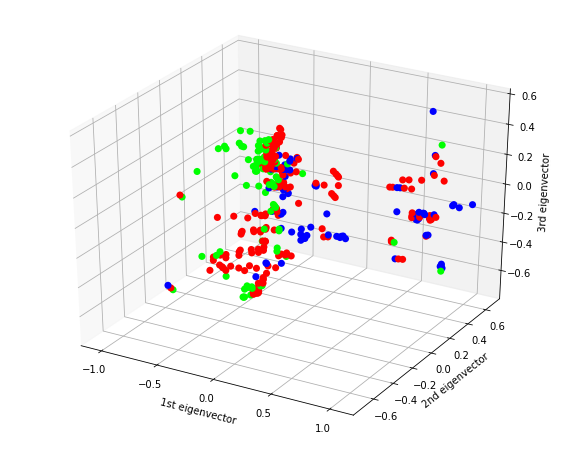

In [23]:
import numpy as np
import math
import matplotlib #scientific plots
import matplotlib.pyplot as plt
#data_SFE=np.genfromtxt('data_nor.csv',delimiter=',')
def PCA(data , n_components):
     #mean- each row w.r.t coloumn
    m = data - np.mean(data , axis = 0)
     #covariance matrix
    cm = np.cov(m , rowvar = False)
     
    #Eigenvalues and Eigenvectors
    eigenvalues , eigenvectors = np.linalg.eigh(cm)
    #linalg.eigh( ) gives eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) or a real symmetric matrix
    #arranging the eigenvalues and eigenvectors in descending order
    arranged_Index = np.argsort(eigenvalues)[::-1]
    arranged_eigenvalues = eigenvalues[arranged_Index]
    arranged_eigenvectors = eigenvectors[:,arranged_Index]
     
    #select the first n eigenvectors, n is desired dimension
    eigenvector_ncom = arranged_eigenvectors[:,0:n_components]
     
   #finally reducing the dimension
    reduced_dim = np.dot(eigenvector_ncom.transpose() , m.transpose() ).transpose()
     
    return reduced_dim
mat_reduced = PCA(data_SFE , 3)
fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(1,2,1, projection='3d')
ax = plt.axes(projection ="3d")
#gs = gridspeci.GridSpec(1, 2,width_ratios=[10,2])
#ax = plt.subplot(gs[0], projection='3d')
#ax2 = plt.subplot(gs[1])


ax.scatter(mat_reduced[:, 0], mat_reduced[:, 1], mat_reduced[:, 2], s=50, c=SFE_classes,  edgecolor='', cmap='brg', depthshade=False)
ax.set_xlabel("1st eigenvector")
#ax.set_xlim(mat_reduced[:,0].min()-0.1,mat_reduced[:,0].max()+0.1)
#ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
#ax.set_ylim(mat_reduced[:,1].min()-0.1,mat_reduced[:,1].max()+0.1)
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
#ax.set_zlim(mat_reduced[:,2].min()-0.1,mat_reduced[:,2].max()+0.1)
#ax.w_zaxis.set_ticklabels([])
#ax.view_init(15,120)
#ax.xaxis.pane.set_edgecolor('black')
#ax.yaxis.pane.set_edgecolor('black')
#ax.zaxis.pane.set_edgecolor('black')
#ax.xaxis.pane.fill = False
##ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
blue_patch = mpatches.Patch(color=[0,0,1], label='Low SFE')
red_patch = mpatches.Patch(color=[1,0,0], label='Medium SFE')
green_patch = mpatches.Patch(color=[0,1,0], label='High SFE')
#plt.axis('off')
#ax2.legend(handles=[blue_patch,red_patch,green_patch ], loc='lower right')
plt.show()

findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


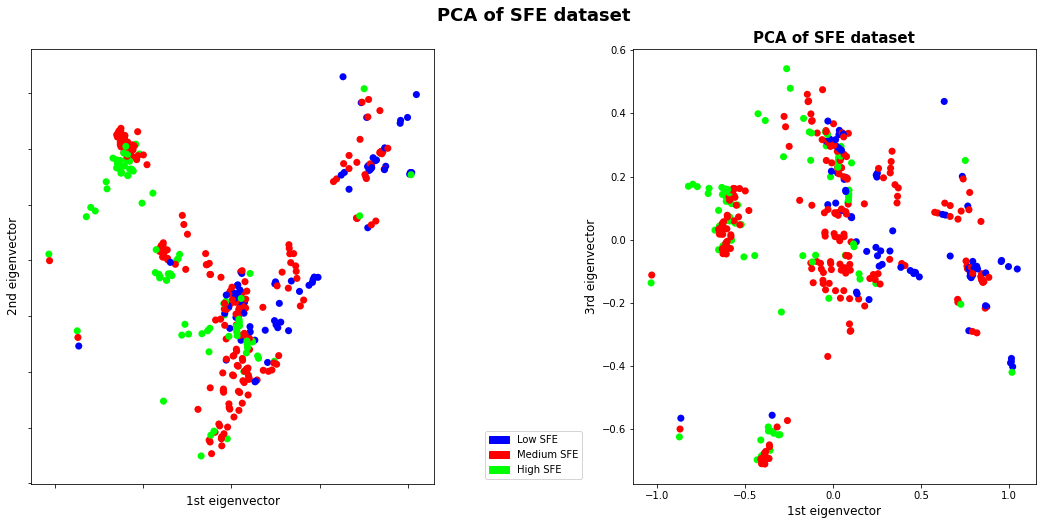

In [25]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(1, 3,width_ratios=[10,2,10])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1],frameon=False)
ax3 = fig.add_subplot(gs[2])

ax1.scatter(mat_reduced[:, 0], mat_reduced[:, 1], s=50, c=SFE_classes, cmap='brg', edgecolor='')
#ax1.set_title("PCA of SFE dataset", fontweight='bold', fontsize=15, fontname='Segoe UI')
ax1.set_xlabel("1st eigenvector", fontsize=12)
ax1.set_xlim(mat_reduced[:,0].min()-0.1,mat_reduced[:,0].max()+0.1)
ax1.xaxis.set_ticklabels([])
ax1.set_ylabel("2nd eigenvector", fontsize=12)
ax1.set_ylim(mat_reduced[:,1].min()-0.1,mat_reduced[:,1].max()+0.1)
ax1.yaxis.set_ticklabels([])

ax3.scatter(mat_reduced[:, 0], mat_reduced[:, 2], s=50, c=SFE_classes, cmap='brg', edgecolor='')
ax3.set_title("PCA of SFE dataset", fontweight='bold', fontsize=15, fontname='Segoe UI')
ax3.set_xlabel("1st eigenvector", fontsize=12)
#ax3.set_xlim(mat_reduced[:,0].min()-0.1,mat_reduced[:,0].max()+0.1)
#ax3.xaxis.set_ticklabels([])
ax3.set_ylabel("3rd eigenvector", fontsize=12)
#ax3.set_ylim(mat_reduced[:,2].min()-0.1,mat_reduced[:,2].max()+0.1)
#ax3.yaxis.set_ticklabels([])

#blue_patch = mpatches.Patch(color=[0,0,1], label='Low SFE')
#red_patch = mpatches.Patch(color=[1,0,0], label='Medium SFE')
#green_patch = mpatches.Patch(color=[0,1,0], label='High SFE')

ax2.set_title("PCA of SFE dataset", fontweight='heavy', fontsize=18)
ax2.title.set_position([0.5,1.05])
ax2.legend(handles=[blue_patch,red_patch,green_patch ], loc='lower center')
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

#plt.savefig('PCA2.png',dpi=500)
plt.show()

we can find a pattern from this 2d images from the above mixed classes obtained from PCA.

In [26]:
#Let's add markers to the plots to understand better.
#Image(filename='PCA_boundaries.png')

we can see that for values <~-0.25 we only have low and Medium SFE values. For value >~0.1 we have high and medium SFE

In [27]:
#Lets print and check the values
#checkarray = np.where((X_pca3[:,0]>0.1))
#print(data_red4[[0,1,2,3,4,5,6,7,8,9]].iloc[checkarray])
#pca3_m=pd.DataFrame(data=X_pca3, columns = ["e1","e2","e3"]) # the values in the 3 components
#pca3_m.head()


Multidimensional Scaling

findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


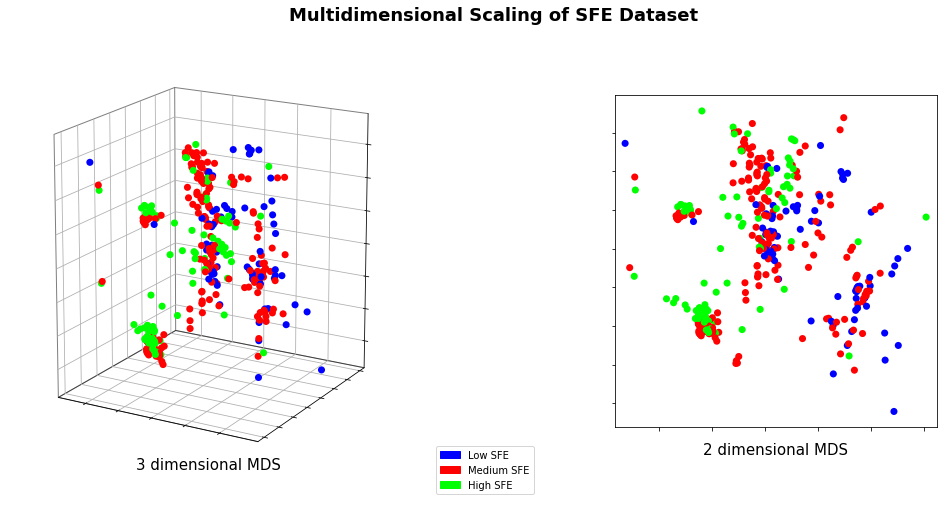

In [55]:
from sklearn import manifold
import matplotlib.gridspec as gridspec


mds3Norm = manifold.MDS(n_components=3, eps = 1e-6, n_init = 3, random_state = 20)
mds3NormY = mds3Norm.fit_transform(data_SFE)

mds2Norm = manifold.MDS(n_components=2, eps = 1e-6, n_init = 3, random_state = 20)
mds2NormY = mds2Norm.fit_transform(data_SFE)

fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(20, 5,width_ratios=[10,2,.5,8,1])
fig.suptitle("Multidimensional Scaling of SFE Dataset", fontweight='bold', fontsize=18, fontname='Segoe UI')
plt.subplots_adjust(top=.95)

ax1 = plt.subplot(gs[:20,0], projection='3d')
ax2 = plt.subplot(gs[:20,1],frameon=False)
ax3 = plt.subplot(gs[3:17,3])

ax1.scatter( mds3NormY[:, 0], mds3NormY[:, 1], mds3NormY[:, 2], c = SFE_classes, s =50,  edgecolor='', depthshade=False, cmap='brg')
ax1.set_title("3 dimensional MDS", fontweight='normal', fontsize=15, fontname='Segoe UI')
ax1.title.set_position([0.5,0.05])
ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.zaxis.set_major_formatter(NullFormatter())
ax1.view_init(15,120)
ax1.xaxis.pane.set_edgecolor('black')
ax1.yaxis.pane.set_edgecolor('black')
ax1.zaxis.pane.set_edgecolor('black')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False



ax3.scatter( mds2NormY[:, 0], mds2NormY[:, 1], c = SFE_classes, s =50,  edgecolor='', cmap='brg')
ax3.set_xlim(mds2NormY[:,0].min()-0.1,mds2NormY[:,0].max()+0.1)
ax3.set_ylim(mds2NormY[:,1].min()-0.1,mds2NormY[:,1].max()+0.1)
ax3.set_title("2 dimensional MDS", fontweight='normal', fontsize=15, fontname='Segoe UI')
ax3.title.set_position([0.5,-0.1])
ax3.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())
#ax3.zaxis.set_major_formatter(NullFormatter())
#fig.colorbar(cax)

blue_patch = mpatches.Patch(color=[0,0,1], label='Low SFE')
red_patch = mpatches.Patch(color=[1,0,0], label='Medium SFE')
green_patch = mpatches.Patch(color=[0,1,0], label='High SFE')

#ax2.set_title("Multidimensional Scaling of SFE dataset", fontweight='heavy', fontsize=18, fontname='Segoe UI')
ax2.title.set_position([0.5,1.05])
ax2.legend(handles=[blue_patch,red_patch,green_patch ], loc='lower center')
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

#plt.savefig('MDS.png',dpi=500)
plt.show()

findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


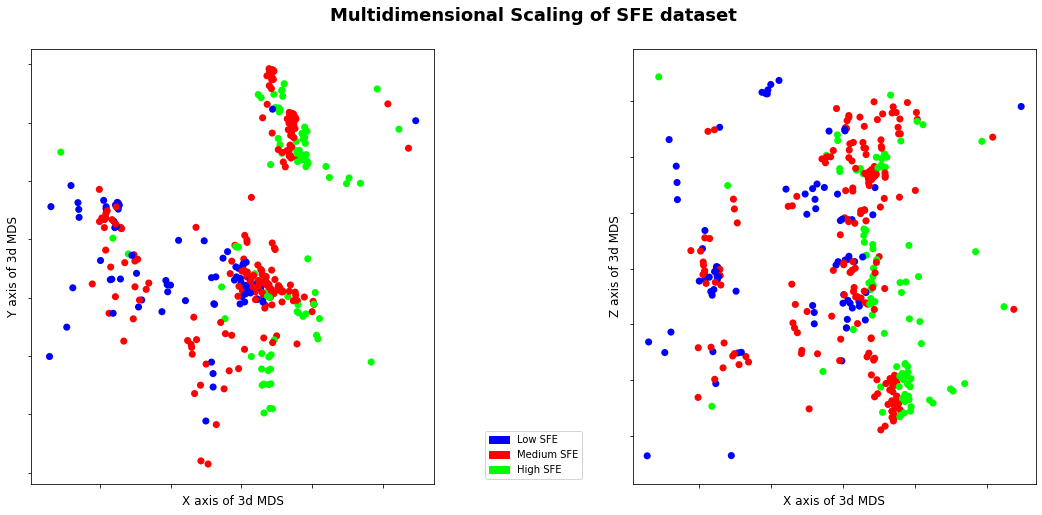

In [29]:
fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(10, 3,width_ratios=[10,2,10])
#fig.suptitle("Multidimensional Scaling of SFE Dataset", fontweight='bold', fontsize=18, fontname='Segoe UI')
#plt.subplots_adjust(top=.95)

ax1 = plt.subplot(gs[:10,0])
ax2 = plt.subplot(gs[:10,1],frameon=False)
ax3 = plt.subplot(gs[:10,2])

ax1.scatter( mds3NormY[:, 0], mds3NormY[:, 1], c = SFE_classes, s =50,  edgecolor='', cmap='brg')
ax1.set_xlabel("X axis of 3d MDS", fontsize=12)
ax1.set_ylabel("Y axis of 3d MDS", fontsize=12)
ax3.set_xlim(mds3NormY[:,0].min()-0.1,mds3NormY[:,0].max()+0.1)
ax3.set_ylim(mds3NormY[:,1].min()-0.1,mds3NormY[:,1].max()+0.1)
#ax1.set_title("3 dimensional view", fontweight='normal', fontsize=15, fontname='Segoe UI')
#ax1.title.set_position([0.5,0.05])
ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())




ax3.scatter( mds3NormY[:, 0], mds3NormY[:, 2], c = SFE_classes, s =50,  edgecolor='', cmap='brg')
ax3.set_xlabel("X axis of 3d MDS", fontsize=12)
ax3.set_ylabel("Z axis of 3d MDS", fontsize=12)
ax3.set_xlim(mds3NormY[:,0].min()-0.1,mds3NormY[:,0].max()+0.1)
ax3.set_ylim(mds3NormY[:,2].min()-0.1,mds3NormY[:,2].max()+0.1)
#ax3.set_title("2 dimensional view", fontweight='normal', fontsize=15, fontname='Segoe UI')
#ax3.title.set_position([0.5,-0.1])
ax3.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())
#ax3.zaxis.set_major_formatter(NullFormatter())
#fig.colorbar(cax)

blue_patch = mpatches.Patch(color=[0,0,1], label='Low SFE')
red_patch = mpatches.Patch(color=[1,0,0], label='Medium SFE')
green_patch = mpatches.Patch(color=[0,1,0], label='High SFE')

ax2.set_title("Multidimensional Scaling of SFE dataset", fontweight='heavy', fontsize=18, fontname='Segoe UI')
ax2.title.set_position([0.5,1.05])
ax2.legend(handles=[blue_patch,red_patch,green_patch ], loc='lower center')
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

#plt.savefig('MDS2.png',dpi=500)
plt.show()


we can see that multidimensional scaling plots are similar to principal component analysis

Classification

In [24]:
master_indices = np.arange(data_SFE.shape[0])
print('master indices shape : ', master_indices.shape)
#choosing test set and corressponding training set
np.random.seed(25)
test_prop = 0.2
test_indices = np.random.choice(data_SFE.shape[0],int(math.floor(test_prop*data_SFE.shape[0])),replace = False)
test_x = data_SFE[test_indices]
test_y = SFE_classes[test_indices]

train_indices = master_indices
print('train indices shape :', train_indices.shape)
for item in test_indices:
    train_indices = np.delete(train_indices,np.where(train_indices==item))
print('train indices shape  :', train_indices.shape)

train_x = data_SFE[train_indices]
train_y = SFE_classes[train_indices]
print(test_x.shape)
print(test_y.shape)
print(train_x.shape)
print(train_y.shape)
#print(test_x[0])
#from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
#train_x, test_x, train_y, test_y = train_test_split(normalization, SFE_classes, test_size=0.2,random_state=25) # 70% training and 20% test
#print('train indices shape  :', train_x.shape)

master indices shape :  (374,)
train indices shape : (374,)
train indices shape  : (300,)
(74, 10)
(74,)
(300, 10)
(300,)


In [32]:
print("1",(SFE_classes[train_indices,]==1).sum(),np.true_divide((SFE_classes[train_indices,]==1).sum(),300))
print("2",(SFE_classes[train_indices,]==2).sum(),np.true_divide((SFE_classes[train_indices,]==2).sum(),300))
print("3",(SFE_classes[train_indices,]==3).sum(),np.true_divide((SFE_classes[train_indices,]==3).sum(),300))


1 59 0.19666666666666666
2 167 0.5566666666666666
3 74 0.24666666666666667


In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#iterating over hyperparameters to select the best for our model
C_range = np.logspace(-2, 10, 10, base=2)
gamma_range = np.logspace(-9, 1, 5, base=2)
k_options = ['linear','poly','rbf']
params_grids = dict(gamma=gamma_range, C=C_range, kernel=k_options)
grid = GridSearchCV(SVC(), param_grid=params_grids, cv=30, n_jobs=10)
grid.fit(train_x,train_y)

print(grid.best_params_)
#grid.grid_scores_


{'C': 0.6299605249474366, 'gamma': 2.0, 'kernel': 'poly'}


In [34]:
#training the model
clf_svc= SVC(kernel= 'poly', C= 0.62, gamma = 2.0, random_state=25)
clf_svc.fit(train_x, train_y)
predict_y_svc = clf_svc.predict(test_x)

#testing model
from sklearn import metrics
model_score = clf_svc.score(test_x, test_y)
print ("Model Score for SVM on actual Data %.2f \n" % (model_score))

train_score = clf_svc.score(train_x, train_y)
print ("Model Score for SVM on training Data %.2f \n" % (train_score))


Model Score for SVM on actual Data 0.84 

Model Score for SVM on training Data 0.86 



In [35]:
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(test_y,predict_y_svc)
print("Confusion Matrix \n",confusion_matrix(test_y,predict_y_svc),"\n")

from sklearn.metrics import precision_score
print ("Precision scores across classes: ", precision_score(test_y,predict_y_svc,average=None), "\n")

from sklearn.metrics import recall_score
print ("Recall scores across classes: ",recall_score(test_y,predict_y_svc,average=None), "\n")

from sklearn.metrics import precision_score
print ("Macro Precision Score: ",precision_score(test_y,predict_y_svc,average='macro'), "\n")

from sklearn.metrics import recall_score
print ("Macro Recall Score: ",recall_score(test_y,predict_y_svc,average='macro'), "\n")

Confusion Matrix 
 [[12  6  0]
 [ 0 40  2]
 [ 1  3 10]] 

Precision scores across classes:  [0.92307692 0.81632653 0.83333333] 

Recall scores across classes:  [0.66666667 0.95238095 0.71428571] 

Macro Precision Score:  0.8575789290075004 

Macro Recall Score:  0.7777777777777778 



In [25]:
#getting percentage values for confusion matrix
np.true_divide(cm_svc,74)*100

NameError: name 'cm_svc' is not defined

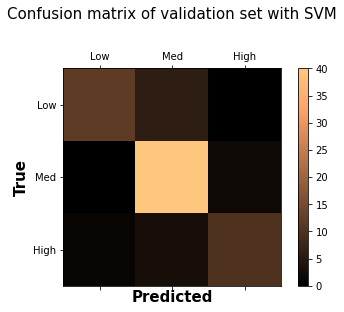

In [37]:

labels = ['Low', 'Med', 'High']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_svc, cmap=plt.get_cmap('copper'))
ax.set_title('Confusion matrix of validation set with SVM', fontsize=15, x=0.5, y=1.2)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted', fontsize=15, fontweight = 'bold')
plt.ylabel('True', fontsize=15,  fontweight = 'bold')
plt.savefig("CM_SVC.png",format ='png', dpi=500, bbox_inches='tight',orientation='landscape')
plt.show()

In [26]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
# print("label precision recall")
# for label in range(3):
#     print(f"{label:5d} {precision(label, cm_svc):9.3f} {recall(label, cm_svc):6.3f}")
# print("precision total:", precision_macro_average(cm_svc))

# print("recall total:", recall_macro_average(cm_svc))
# print(accuracy(cm_svc))
def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy

Random forest

In [27]:
#Decision Tree for Classification Methods
class Decision_Node():
    #It is a root node
    def __init__(self, feature_index=None, threshold_val=None,
                 value=None, left_branch=None, right_branch=None):
        self.feature_index = feature_index    #Feature index helps us to measure threshold.     
        self.threshold_val = threshold_val #gives access to Decision function output which we use to make the prediction.
        self.value = value #The prediction, if its classification tree or not.                 
        self.left_branch = left_branch      # left branch/subtree/child of a tree
        self.right_branch = right_branch    # right branch/subtree/child of a tree

class Decision_Tree(object):

    def __init__(self, min_samples=2, min_imp=1e-7,maxi_depth=float("inf"), loss_fun=None):
        self.root = None # initialize the root of the tree t
        self.min_samples = min_samples #the total number of splits we are using to build tree
        self.min_imp = min_imp #he minimum impurity that should be used to split the tree further.
        self.maxi_depth = maxi_depth #The maximum depth to stop splitting.
        self._impurity_cal = None # to decide optimal split required for node
        self._leaf_value_cal = None #to predict y al leaf
        self.dimension = None # dimension of y(multi-dim)
        self.loss_fun = loss_fun #It is a function to calculate impurity for Gradient Boosting models.

    def fit(self, X, y, loss_fun=None):
        #function to train/build decision tree
        self.dimension = len(np.shape(y)) == 1
        self.root = self._grow_tree(X, y)
        self.loss_fun=None
    
    def _grow_tree(self, X, y_f, curr_depth=0):
        Max_imp = 0 
        BestMeasure = None    # to represent threshold values and Feature index
        BestSplit = None        # to represent subtress

        # Check if expansion of y is needed
        if len(np.shape(y_f)) == 1:
            y_f = np.expand_dims(y_f, axis=1)

        
        X_y = np.concatenate((X, y_f), axis=1) # joining into one

        num_samples, num_features = np.shape(X)

        if num_samples >= self.min_samples and curr_depth <= self.maxi_depth:
            # loop over all values of feature index
            for feature_index in range(num_features):
                
                feature_values = np.expand_dims(X[:, feature_index], axis=1)
                Possible_values = np.unique(feature_values)

                # loop over all feature values present in data
                for threshold_val in Possible_values:
                    # Split the data depending on feature values of feature index
                    Xy_1, Xy_2 = self.split(X_y, feature_index, threshold_val)

                    if len(Xy_1) > 0 and len(Xy_2) > 0:
                        # setting y_f values into sets of two
                        y1 = Xy_1[:, num_features:]
                        y2 = Xy_2[:, num_features:]

                        # compute information gain
                        curr_imp = self._impurity_cal(y_f, y1, y2)

                        # we are saving best measure and bestsplit values
                        if curr_imp > Max_imp:
                            Max_imp = curr_imp
                            BestMeasure = {"feature_index": feature_index, "threshold_val": threshold_val}
                            BestSplit = {
                                "left_X": Xy_1[:, :num_features],   # left branch of X
                                "left_y": Xy_1[:, num_features:],   # left branch of y
                                "right_X": Xy_2[:, :num_features],  # right branch of X
                                "right_y": Xy_2[:, num_features:]   # right branch of y
                                }

        if Max_imp > self.min_imp:
            # Build subtrees for the right and left branches
            left_branch = self._grow_tree(BestSplit["left_X"], BestSplit["left_y"], curr_depth + 1)
            right_branch = self._grow_tree(BestSplit["right_X"], BestSplit["right_y"], curr_depth + 1)
            return Decision_Node(feature_index=BestMeasure["feature_index"], 
                                threshold_val=BestMeasure["threshold_val"], left_branch=left_branch, 
                                right_branch=right_branch)

        # determining leaf value
        leaf_val = self._leaf_value_cal(y_f)

        return Decision_Node(value=leaf_val)

    def split(self, X, feature_index, threshold_val):
        
    #X=dataset
    # we will divide dataset by comparing the sample value feature index with threshold
        condition = None
        if isinstance(threshold_val, int) or isinstance(threshold_val, float):
            condition = lambda sample: sample[feature_index] >= threshold_val
        else:
            condition = lambda sample: sample[feature_index] == threshold_val

        X_left = np.array([sample for sample in X if condition(sample)])
        X_right = np.array([sample for sample in X if not condition(sample)])

        return np.array([X_left, X_right])
    def prediction_value(self, x, tree=None):
        # prediction of sample by the value of leaf using recursive search

        if tree == None:
            tree = self.root

        # if we found the value use it as prediction
        if tree.value != None:
            return tree.value

        # Choose the feature that we will test
        feature_val = x[tree.feature_index]

        # finding the side of the branch
        tree_branch = tree.right_branch
        if isinstance(feature_val, int) or isinstance(feature_val, float):
            if feature_val >= tree.threshold_val:
                tree_branch = tree.left_branch
        elif feature_val == tree.threshold_val:
            tree_branch = tree.left_branch

        # Testing the branch
        return self.prediction_value(x, tree_branch)

    def predict(self, X):
        #each single sample check and return labels
        y_pred = [self.prediction_value(x) for x in X]
        return y_pred

    def print_tree(self, tree=None, indent=" "):
        #function to print the tree
        if not tree:
            tree = self.root

        # if we found the value use it as label
        if tree.value is not None:
            print (tree.value)
        # going deep into tree
        else:
            # Print the test, right and left values
            print ("%s:%s? " % (tree.feature_index, tree.threshold_val))
            print ("%sTrue->" % (indent), end="")
            self.print_tree(tree.left_branch, indent + indent)
            print ("%sFalse->" % (indent), end="")
            self.print_tree(tree.right_branch, indent + indent)

            
class Classification_Tree(Decision_Tree):
    def information_gain_cal(self, y_f, y_1, y_2):
        # Calculate information gain
        p = len(y_1) / len(y_f)
        entropy = self.calculateEntropy(y_f)
        info_gain_ob = entropy - p * \
            self.calculateEntropy(y_1) - (1 - p) * \
            self.calculateEntropy(y_2)

        return info_gain_ob
    def calculateEntropy(self, E):
    #function to calculate Entropy
        class_labels = np.unique(E)
        entropy = 0
        for label in class_labels:
            probabilities = len(E[E == label]) / len(E)
            entropy += -probabilities * math.log(probabilities, 2)
        return entropy

    def _hard_voting(self, y_f):
        maj_common = None
        maxi_count = 0
        for label in np.unique(y_f):
            # we are counting the occurance of features with label
            count_num = len(y_f[y_f == label])
            if count_num > maxi_count:
                maj_common = label
                maxi_count = count_num
        return maj_common

    def fit(self, X, y_f):
        self._impurity_cal = self.information_gain_cal
        self._leaf_value_cal = self._hard_voting
        super(Classification_Tree, self).fit(X, y_f)

In [28]:
import progressbar
#To check the process of running operation
bar_custom_widgets = [
    "Training Model: ", progressbar.Percentage(), " ", progressbar.Bar(marker="-"),
    ' ', progressbar.ETA()
]
def get_random_subsets(X, y, n_subsets, replacements=True):
    """ Return random subsets (with replacements) of the data """
    n_samples = np.shape(X)[0]
    # Concatenate x and y and do a random shuffle
    X_y = np.concatenate((X, y.reshape((1, len(y))).T), axis=1)
    np.random.shuffle(X_y)
    subsets = []

    # Uses 50% of training samples without replacements
    subsample_size = int(n_samples // 2)
    if replacements:
        subsample_size = n_samples      # 100% with replacements

    for _ in range(n_subsets):
        idx = np.random.choice(
            range(n_samples),
            size=np.shape(range(subsample_size)),
            replace=replacements)
        X = X_y[idx][:, :-1]
        y = X_y[idx][:, -1]
        subsets.append([X, y])
    return subsets

class Random_Forest():
    #We will use the classification_tree that train and useon random subsets of data and features.
    def __init__(self, num_estimators=100, maxi_features=None, min_samples=2,
                 mini_gain=0, maxi_depth=float("inf")):
        self.num_estimators = num_estimators    # The number of classification trees
        self.maxi_features = maxi_features    # Maxmimum number of features on classification tree
        self.min_samples = min_samples #the total number of splits we are using to build tree
        self.mini_gain = mini_gain            # Minimum information gain req. to split tree further
        self.maxi_depth = maxi_depth          # Maxi depth of tree
        self.progressbar = progressbar.ProgressBar(widgets=bar_custom_widgets)

        # set decision_trees
        self.deci_trees = []
        for _ in range(num_estimators):
            self.deci_trees.append(
                Classification_Tree(
                    min_samples=self.min_samples,
                    min_imp=mini_gain,
                    maxi_depth=self.maxi_depth))

    def fit(self, X, y_f):
        num_features = np.shape(X)[1]
        # If maxi_features is not defined, select as
        # sqrt(num_features)
        if not self.maxi_features:
            self.maxi_features = int(math.sqrt(num_features))

        # one random_subset is choosen for each tree from data
        sets = get_random_subsets(X, y_f, self.num_estimators)

        for i in self.progressbar(range(self.num_estimators)):
            X_set, y_set = sets[i]
            # selecting random_subsets of the sample features)
            idx = np.random.choice(range(num_features), size=self.maxi_features, replace=True)
            # Save the indices of the features for prediction
            self.deci_trees[i].feature_i = idx
            # Choosing the features w.r.t indices
            X_set = X_set[:, idx]
            # Fitting the tree to the train model(data)
            self.deci_trees[i].fit(X_set, y_set)

    def predict(self, X):
        y_predictions = np.empty((X.shape[0], len(self.deci_trees)))
        # prediction by each tree
        for i, tree in enumerate(self.deci_trees):
            #  features Indices of the trained tree
            idx = tree.feature_i
            # Making the prediction on features
            prediction = tree.predict(X[:, idx])
            y_predictions[:, i] = prediction
            
        y_predi = []
        # For each faeture
        for sample_preds in y_predictions:
            # Selecting class for prediction
            y_predi.append(np.bincount(sample_preds.astype('int')).argmax())
        return y_predi
#X_train, X_test, y_train, y_test = train_test_split(normalization, SFE_classes, test_size=0.2, seed=1)
RF=Random_Forest()
RF.fit(train_x, train_y)
RF_predict=RF.predict(test_x)
#print(üü)
hl=accuracy_score(test_y, RF_predict)
#print(hl)
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(test_y, RF_predict)
print("Confusion Matrix \n",confusion_matrix(test_y,RF_predict),"\n")
from sklearn.metrics import precision_score
print("Macro Precision score: ",precision_score(test_y,RF_predict,average='macro'), "\n")

from sklearn.metrics import recall_score
print("Macro Recall score: ", recall_score(test_y,RF_predict,average='macro'), "\n")
print("label precision recall")

Confusion Matrix 
 [[ 9  9  0]
 [ 1 38  3]
 [ 1  4  9]] 

Macro Precision score:  0.7710932857991682 

Macro Recall score:  0.6825396825396824 

label precision recall


Artifical neural networks

In [29]:
#optimizers

# import numpy as np
# def normalize(X, axis=-1, order=2):
#     """ Normalize the dataset X """
#     l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
#     l2[l2 == 0] = 1
#     return X / np.expand_dims(l2, axis)
def make_diagonal(x):
    """ Converts a vector into an diagonal matrix """
    m = np.zeros((len(x), len(x)))
    for i in range(len(m[0])):
        m[i, i] = x[i]
    return m

# An optimizer is a function/an algorithm that modifies the attributes of the neural network, such as weights and learning rate
# weights: minimizes the loss.
#reduces overall loss and improve the accuracy
# https://ruder.io/optimizing-gradient-descent/

class StochasticGradientDescent():
    def __init__(self, learning_rate=0.01, momentum=0):
        self.learning_rate = learning_rate 
        self.momentum = momentum
        self.w_updt = None

    def update(self, w, grad_wrt_w):
        # If not initialized
        if self.w_updt is None:
            self.w_updt = np.zeros(np.shape(w))
        # Use momentum if set
        self.w_updt = self.momentum * self.w_updt + (1 - self.momentum) * grad_wrt_w
        # Move against the gradient to minimize loss
        return w - self.learning_rate * self.w_updt

class NesterovAcceleratedGradient():
    def __init__(self, learning_rate=0.001, momentum=0.4):
        self.learning_rate = learning_rate 
        self.momentum = momentum
        self.w_updt = np.array([])

    def update(self, w, grad_func):
        # Calculate the gradient of the loss a bit further down the slope from w
        approx_future_grad = np.clip(grad_func(w - self.momentum * self.w_updt), -1, 1)
        # Initialize on first update
        if not self.w_updt.any():
            self.w_updt = np.zeros(np.shape(w))

        self.w_updt = self.momentum * self.w_updt + self.learning_rate * approx_future_grad
        # Move against the gradient to minimize loss
        return w - self.w_updt

class Adagrad():
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.G = None # Sum of squares of the gradients
        self.eps = 1e-8

    def update(self, w, grad_wrt_w):
        # If not initialized
        if self.G is None:
            self.G = np.zeros(np.shape(w))
        # Add the square of the gradient of the loss function at w
        self.G += np.power(grad_wrt_w, 2)
        # Adaptive gradient with higher learning rate for sparse data
        return w - self.learning_rate * grad_wrt_w / np.sqrt(self.G + self.eps)

class Adadelta():
    def __init__(self, rho=0.95, eps=1e-6):
        self.E_w_updt = None # Running average of squared parameter updates
        self.E_grad = None   # Running average of the squared gradient of w
        self.w_updt = None   # Parameter update
        self.eps = eps
        self.rho = rho

    def update(self, w, grad_wrt_w):
        # If not initialized
        if self.w_updt is None:
            self.w_updt = np.zeros(np.shape(w))
            self.E_w_updt = np.zeros(np.shape(w))
            self.E_grad = np.zeros(np.shape(grad_wrt_w))

        # Update average of gradients at w
        self.E_grad = self.rho * self.E_grad + (1 - self.rho) * np.power(grad_wrt_w, 2)
        
        RMS_delta_w = np.sqrt(self.E_w_updt + self.eps)
        RMS_grad = np.sqrt(self.E_grad + self.eps)

        # Adaptive learning rate
        adaptive_lr = RMS_delta_w / RMS_grad

        # Calculate the update
        self.w_updt = adaptive_lr * grad_wrt_w

        # Update the running average of w updates
        self.E_w_updt = self.rho * self.E_w_updt + (1 - self.rho) * np.power(self.w_updt, 2)

        return w - self.w_updt

class RMSprop():
    def __init__(self, learning_rate=0.01, rho=0.9):
        self.learning_rate = learning_rate
        self.Eg = None # Running average of the square gradients at w
        self.eps = 1e-8
        self.rho = rho

    def update(self, w, grad_wrt_w):
        # If not initialized
        if self.Eg is None:
            self.Eg = np.zeros(np.shape(grad_wrt_w))

        self.Eg = self.rho * self.Eg + (1 - self.rho) * np.power(grad_wrt_w, 2)

        # Divide the learning rate for a weight by a running average of the magnitudes of recent
        # gradients for that weight
        return w - self.learning_rate *  grad_wrt_w / np.sqrt(self.Eg + self.eps)

class Adam():
    def __init__(self, learning_rate=0.001, b1=0.9, b2=0.999):
        self.learning_rate = learning_rate
        self.eps = 1e-8
        self.m = None
        self.v = None
        # Decay rates
        self.b1 = b1
        self.b2 = b2

    def update(self, w, grad_wrt_w):
        # If not initialized
        if self.m is None:
            self.m = np.zeros(np.shape(grad_wrt_w))
            self.v = np.zeros(np.shape(grad_wrt_w))
        
        self.m = self.b1 * self.m + (1 - self.b1) * grad_wrt_w
        self.v = self.b2 * self.v + (1 - self.b2) * np.power(grad_wrt_w, 2)

        m_hat = self.m / (1 - self.b1)
        v_hat = self.v / (1 - self.b2)

        self.w_updt = self.learning_rate * m_hat / (np.sqrt(v_hat) + self.eps)

        return w - self.w_updt

In [37]:
#Loss functions

class SquareLoss():
    def __init__(self,y_true, y_pred):
        self.y_true=None
        self.y_pred=None
    def loss(self):
        return 0.5 * np.power((self.y_true - self.y_pred), 2)
    def gradient(self, y, y_pred):
        return -(self.y_true - self.y_pred)
 

class CrossEntropy():
    def __init__(self,y_true, y_pred):
        self.y_true=None
        self.y_pred=None

    def loss(self):
        # Avoid division by zero
        p = np.clip(self.y_pred, 1e-15, 1 - 1e-15)
        return - self.y_true * np.log(p) - (1 - self.y_true) * np.log(1 - p)

    def acc(self):
        return accuracy_score(np.argmax(self.y_true, axis=1), np.argmax(self.y_pred, axis=1))

    def gradient(self):
        # Avoid division by zero
        p = np.clip(self.y_pred, 1e-15, 1 - 1e-15)
        return - (self.y_true / p) + (1 - self.y_true) / (1 - p)

In [38]:
#activation functions
# Collection of activation functions
# Reference: https://en.wikipedia.org/wiki/Activation_function

class Sigmoid():
    def __call__(self, input_tensor: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-input_tensor))
    #derivative of sigmoid
    def gradient(self, input_tensor: np.ndarray) -> np.ndarray:
        return self.__call__(input_tensor) * (1 - self(input_tensor))

class Softmax():
    def __call__(self, input_tensor: np.ndarray) -> np.ndarray:
        e_x = np.exp(input_tensor - np.max(input_tensor, axis=-1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims=True)

    def gradient(self, input_tensor: np.ndarray) -> np.ndarray:
        p = self.__call__(input_tensor)
        return p * (1 - p)

class TanH():
    def __call__(self, input_tensor: np.ndarray) -> np.ndarray:
        return 2 / (1 + np.exp(-2*input_tensor)) - 1

    def gradient(self, input_tensor: np.ndarray) -> np.ndarray:
        return 1 - np.power(self(input_tensor), 2)

class ReLU():
    def __call__(self, input_tensor: np.ndarray) -> np.ndarray:
        return np.where(input_tensor >= 0, input_tensor, 0)

    def gradient(self, input_tensor: np.ndarray) -> np.ndarray:
        return np.where(input_tensor >= 0, 1, 0)

class LeakyReLU():
    def __init__(self, alpha=0.2):
        self.alpha = alpha

    def __call__(self, input_tensor: np.ndarray) -> np.ndarray:
        return np.where(input_tensor >= 0, input_tensor, self.alpha * input_tensor)

    def gradient(self, input_tensor: np.ndarray) -> np.ndarray:
        return np.where(input_tensor >= 0, 1, self.alpha)

class ELU():
    def __init__(self, alpha=0.1):
        self.alpha = alpha 

    def __call__(self, input_tensor: np.ndarray) -> np.ndarray:
        return np.where(input_tensor >= 0.0, input_tensor, self.alpha * (np.exp(input_tensor) - 1))

    def gradient(self, input_tensor: np.ndarray) -> np.ndarray:
        return np.where(input_tensor >= 0.0, 1, self(input_tensor) + self.alpha)

class SELU():
    # Reference : https://arxiv.org/abs/1706.02515,
    # https://github.com/bioinf-jku/SNNs/blob/master/SelfNormalizingNetworks_MLP_MNIST.ipynb
    def __init__(self):
        self.alpha = 1.6732632423543772848170429916717
        self.scale = 1.0507009873554804934193349852946 

    def __call__(self, x):
        return self.scale * np.where(x >= 0.0, x, self.alpha*(np.exp(x)-1))

    def gradient(self, x):
        return self.scale * np.where(x >= 0.0, 1, self.alpha * np.exp(x))

class SoftPlus():
    def __call__(self, x):
        return np.log(1 + np.exp(x))

    def gradient(self, x):
        return 1 / (1 + np.exp(-x))


In [39]:

from __future__ import print_function, division
import copy



class Layer(object):

    def set_input_shape(self, shape):
        """ Sets the shape that the layer expects of the input in the forward
        pass method """
        self.input_shape = shape

    def layer_name(self):
        """ The name of the layer. Used in model summary. """
        return self.__class__.__name__

    def parameters(self):
        """ The number of trainable parameters used by the layer """
        return 0

    def forward_pass(self, X, training):
        """ Propogates the signal forward in the network """
        raise NotImplementedError()

    def backward_pass(self, accum_grad):
        """ Propogates the accumulated gradient backwards in the network.
        If the has trainable weights then these weights are also tuned in this method.
        As input (accum_grad) it receives the gradient with respect to the output of the layer and
        returns the gradient with respect to the output of the previous layer. """
        raise NotImplementedError()

    def output_shape(self):
        """ The shape of the output produced by forward_pass """
        raise NotImplementedError()


class Dense(Layer):
    """A fully-connected NN layer.
    Parameters:
    -----------
    n_units: int
        The number of neurons in the layer.
    input_shape: tuple
        The expected input shape of the layer. For dense layers a single digit specifying
        the number of features of the input. Must be specified if it is the first layer in
        the network.
    """
    def __init__(self, n_units, input_shape=None):
        self.layer_input = None
        self.input_shape = input_shape
        self.n_units = n_units
        self.trainable = True
        self.W = None
        self.w0 = None

    def initialize(self, optimizer):
        # Initialize the weights
        limit = 1 / math.sqrt(self.input_shape[0])
        self.W  = np.random.uniform(-limit, limit, (self.input_shape[0], self.n_units))
        self.w0 = np.zeros((1, self.n_units))
        # Weight optimizers
        self.W_opt  = copy.copy(optimizer)
        self.w0_opt = copy.copy(optimizer)

    def parameters(self):
        return np.prod(self.W.shape) + np.prod(self.w0.shape)

    def forward_pass(self, X, training=True):
        self.layer_input = X
        return X.dot(self.W) + self.w0

    def backward_pass(self, accum_grad):
        # Save weights used during forwards pass
        W = self.W

        if self.trainable:
            # Calculate gradient w.r.t layer weights
            grad_w = self.layer_input.T.dot(accum_grad)
            grad_w0 = np.sum(accum_grad, axis=0, keepdims=True)

            # Update the layer weights
            self.W = self.W_opt.update(self.W, grad_w)
            self.w0 = self.w0_opt.update(self.w0, grad_w0)

        # Return accumulated gradient for next layer
        # Calculated based on the weights used during the forward pass
        accum_grad = accum_grad.dot(W.T)
        return accum_grad

    def output_shape(self):
        return (self.n_units, )

class Dropout(Layer):
    """A layer that randomly sets a fraction p of the output units of the previous layer
    to zero.
    Parameters:
    -----------
    p: float
        The probability that unit x is set to zero.
    """
    def __init__(self, p=0.2):
        self.p = p
        self._mask = None
        self.input_shape = None
        self.n_units = None
        self.pass_through = True
        self.trainable = True

    def forward_pass(self, X, training=True):
        c = (1 - self.p)
        if training:
            self._mask = np.random.uniform(size=X.shape) > self.p
            c = self._mask
        return X * c

    def backward_pass(self, accum_grad):
        return accum_grad * self._mask

    def output_shape(self):
        return self.input_shape

activation_functions = {
    'relu': ReLU,
    'sigmoid': Sigmoid,
    'selu': SELU,
    'elu': ELU,
    'softmax': Softmax,
    'leaky_relu': LeakyReLU,
    'tanh': TanH,
    'softplus': SoftPlus
}

class Activation(Layer):
    """A layer that applies an activation operation to the input.
    Parameters:
    -----------
    name: string
        The name of the activation function that will be used.
    """

    def __init__(self, name):
        self.activation_name = name
        self.activation_func = activation_functions[name]()
        self.trainable = True

    def layer_name(self):
        return "Activation (%s)" % (self.activation_func.__class__.__name__)

    def forward_pass(self, X, training=True):
        self.layer_input = X
        return self.activation_func(X)

    def backward_pass(self, accum_grad):
        return accum_grad * self.activation_func.gradient(self.layer_input)

    def output_shape(self):
        return self.input_shape


# Method which calculates the padding based on the specified output shape and the
# shape of the filters
def determine_padding(filter_shape, output_shape="same"):

    # No padding
    if output_shape == "valid":
        return (0, 0), (0, 0)
    # Pad so that the output shape is the same as input shape (given that stride=1)
    elif output_shape == "same":
        filter_height, filter_width = filter_shape

        # Derived from:
        # output_height = (height + pad_h - filter_height) / stride + 1
        # In this case output_height = height and stride = 1. This gives the
        # expression for the padding below.
        pad_h1 = int(math.floor((filter_height - 1)/2))
        pad_h2 = int(math.ceil((filter_height - 1)/2))
        pad_w1 = int(math.floor((filter_width - 1)/2))
        pad_w2 = int(math.ceil((filter_width - 1)/2))

        return (pad_h1, pad_h2), (pad_w1, pad_w2)

In [40]:
def batch_iterator(X, y=None, batch_size=64):
    """ Simple batch generator """
    n_samples = X.shape[0]
    for i in np.arange(0, n_samples, batch_size):
        begin, end = i, min(i+batch_size, n_samples)
        if y is not None:
            yield X[begin:end], y[begin:end]
        else:
            yield X[begin:end]
class NeuralNetwork():
    """Neural Network. Deep Learning base model.

    Parameters:
    -----------
    optimizer: class
        The weight optimizer that will be used to tune the weights in order of minimizing
        the loss.
    loss: class
        Loss function used to measure the model's performance. SquareLoss or CrossEntropy.
    validation: tuple
        A tuple containing validation data and labels (X, y)
    """
    def __init__(self, optimizer, loss, validation_data=None):
        self.optimizer = optimizer
        self.layers = []
        self.errors = {"training": [], "validation": []}
        self.loss_function = loss()
        self.progressbar = progressbar.ProgressBar(widgets=bar_custom_widgets)

        self.val_set = None
        if validation_data:
            X, y = validation_data
            self.val_set = {"X": X, "y": y}

    def set_trainable(self, trainable):
        """ Method which enables freezing of the weights of the network's layers. """
        for layer in self.layers:
            layer.trainable = trainable

    def add(self, layer):
        """ Method which adds a layer to the neural network """
        # If this is not the first layer added then set the input shape
        # to the output shape of the last added layer
        if self.layers:
            layer.set_input_shape(shape=self.layers[-1].output_shape())

        # If the layer has weights that needs to be initialized 
        if hasattr(layer, 'initialize'):
            layer.initialize(optimizer=self.optimizer)

        # Add layer to the network
        self.layers.append(layer)

    def test_on_batch(self, X, y):
        """ Evaluates the model over a single batch of samples """
        y_pred = self._forward_pass(X, training=False)
        loss = np.mean(self.loss_function.loss(y, y_pred))
        acc = self.loss_function.accu(y, y_pred)

        return loss, acc

    def train_on_batch(self, X, y):
        """ Single gradient update over one batch of samples """
        y_pred = self._forward_pass(X)
        loss = np.mean(self.loss_function.loss(y, y_pred))
        acc = self.loss_function.accu(y, y_pred)
        # Calculate the gradient of the loss function wrt y_pred
        loss_grad = self.loss_function.grad(y, y_pred)
        # Backpropagate. Update weights
        self._backward_pass(loss_grad=loss_grad)

        return loss, acc

    def fit(self, X, y, n_epochs, batch_size):
        """ Trains the model for a fixed number of epochs """
        for _ in self.progressbar(range(n_epochs)):
            
            batch_error = []
            for X_batch, y_batch in batch_iterator(X, y, batch_size=batch_size):
                loss, _ = self.train_on_batch(X_batch, y_batch)
                batch_error.append(loss)

            self.errors["training"].append(np.mean(batch_error))

            if self.val_set is not None:
                val_loss, _ = self.test_on_batch(self.val_set["X"], self.val_set["y"])
                self.errors["validation"].append(val_loss)

        return self.errors["training"], self.errors["validation"]

    def _forward_pass(self, X, training=True):
        """ Calculate the output of the NN """
        layer_output = X
        for layer in self.layers:
            layer_output = layer.forward_pass(layer_output, training)

        return layer_output

    def _backward_pass(self, loss_grad):
        """ Propagate the gradient 'backwards' and update the weights in each layer """
        for layer in reversed(self.layers):
            loss_grad = layer.backward_pass(loss_grad)

    # def summary(self, name="Model Summary"):
    #     # Print model name
    #     print (AsciiTable([[name]]).table)
    #     # Network input shape (first layer's input shape)
    #     print ("Input Shape: %s" % str(self.layers[0].input_shape))
    #     # Iterate through network and get each layer's configuration
    #     table_data = [["Layer Type", "Parameters", "Output Shape"]]
    #     tot_params = 0
    #     for layer in self.layers:
    #         layer_name = layer.layer_name()
    #         params = layer.parameters()
    #         out_shape = layer.output_shape()
    #         table_data.append([layer_name, str(params), str(out_shape)])
    #         tot_params += params
    #     # Print network configuration table
    #     print (AsciiTable(table_data).table)
    #     print ("Total Parameters: %d\n" % tot_params)

    def predict(self, X):
        """ Use the trained model to predict labels of X """
        return self._forward_pass(X, training=False)

(300, 3)
(74, 3)


Training Model: 100% |------------------------------------------| Time: 0:00:10


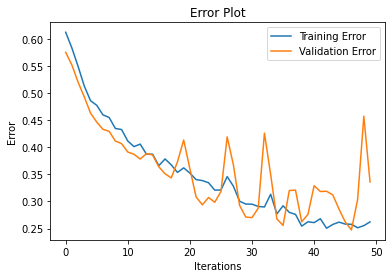

Accuracy: 0.8108108108108109
[1 1 1 1 1 1 2 2 1 0 0 1 1 1 1 1 2 1 2 1 1 0 0 1 0 2 0 2 1 1 2 0 1 1 2 2 2
 1 2 1 2 1 1 0 0 1 1 1 1 0 2 2 1 1 0 1 1 1 1 1 1 1 2 0 1 1 2 1 1 1 1 1 2 1]
Confusion Matrix 
 [[11  7  0]
 [ 0 37  5]
 [ 1  1 12]] 



In [41]:
def to_categorical(x, n_col=None):
    """ One-hot encoding of nominal values """
    if not n_col:
        n_col = np.amax(x) + 1
    one_hot = np.zeros((x.shape[0], n_col))
    one_hot[np.arange(x.shape[0]), x] = 1
    return one_hot
def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    # Split the training data from test data in the ratio specified in
    # test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test
def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]



def main():

    optimizer = Adam()

    #-----
    # MLP
    #-----

    X = data_SFE
    #y = SFE_classes
    #print(y)
    
    # # Convert to one-hot encoding
    #y = to_categorical(y.astype("int"))

    n_samples, n_features = data_SFE.shape
    n_hidden = 150
    #from sklearn.model_selection import train_test_split 
    #xx, x_test, yy, y_test = train_test_split (normalization,SFE_classes, test_size=0.2, train_size=0.8 )

   # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, seed=25)
    y_train = to_categorical(train_y.astype("int"))
    y_test = to_categorical(test_y.astype("int"))
    #print(X_train.shape)
    print(y_train.shape)
    #print(X_test.shape)
    print(y_test.shape)
    # x_test = x_test.reshape(xx.shape[1], 3)
    # y_test = y_test.reshape(yy.shape[1], 3)

    clf = NeuralNetwork(optimizer=optimizer,
                        loss=Cross_Entropy,
                        validation_data=(test_x, y_test))

    clf.add(Dense(n_hidden, input_shape=(n_features,)))
    clf.add(Activation('leaky_relu'))
    clf.add(Dense(n_hidden))
    clf.add(Activation('leaky_relu'))
    clf.add(Dropout(0.25))
    clf.add(Dense(n_hidden))
    clf.add(Activation('leaky_relu'))
    clf.add(Dropout(0.25))
    clf.add(Dense(n_hidden))
    clf.add(Activation('leaky_relu'))
    clf.add(Dropout(0.25))
    clf.add(Dense(3))
    clf.add(Activation('softmax'))

    #print ()
    #clf.summary(name="MLP")
    
    train_err, val_err = clf.fit(train_x, y_train, n_epochs=50, batch_size=10)
    
    # Training and validation error plot
    n = len(train_err)
    training, = plt.plot(range(n), train_err, label="Training Error")
    validation, = plt.plot(range(n), val_err, label="Validation Error")
    plt.legend(handles=[training, validation])
    plt.title("Error Plot")
    plt.ylabel('Error')
    plt.xlabel('Iterations')
    plt.show()

    _, accuracy = clf.test_on_batch(test_x, y_test)
    print ("Accuracy:", accuracy)

    # Reduce dimension to 2D using PCA and plot the results
    y_pred = np.argmax(clf.predict(test_x), axis=1)
    print(y_pred)
    #Plot().plot_in_2d(X_test, y_pred, title="Multilayer Perceptron", accuracy=accuracy, legend_labels=range(10))
    from sklearn.metrics import confusion_matrix
    cm_svc = confusion_matrix(test_y, y_pred)
    print("Confusion Matrix \n",confusion_matrix(test_y,y_pred),"\n")
    # hr=np.true_divide(cm_svc,74)*100
    # print(hr)

if __name__ == "__main__":
   main()

In [ ]:
n,p = data_SFE.shape
dim = 2
X = np.random.rand(n,dim)

# randomly initialize a solution for the pivot point.
dfrand = spark.createDataFrame(sc.parallelize(X.tolist()).zipWithIndex()).toDF("X", 
                     "id2").repartition("id2")
df = df.join(dfrand, df.id==dfrand.id2, "inner").drop("id1")

def pairwise_metric2(y):
    dist = []
    for x in X_bc.value:
        dist += [ma.sqrt(np.sum((np.array(x)-np.array(y))**2))]
    return(dist)

# create the matrix B
def B(id,x,y):

    y,x = np.array(y), np.array(x) 
    y[y==0.0] = np.inf
    z = -x/y

    z[id] = -(np.sum(z)-z[id])
    return(z.tolist())

# function for matrix multiplication using outer multiplication
def df_mult(df, col1, col2, n1, n2, matrix=True):

    udf_mult = f.udf(lambda x,y:np.outer(np.array(x), 
                  np.array(y)).flatten().tolist(),
                   t.ArrayType(t.DoubleType()))

    df = df.withColumn("mult", udf_mult(col1, col2))
    df = df.agg(f.array([f.sum(f.col("mult")[i]) 
             for i in range(n1*n2)])).toDF("mult")
    if not matrix:
        return(df)
    st = t.ArrayType(t.StructType(
                [t.StructField("id",t.LongType()),
                 t.StructField("row",t.ArrayType(
                 t.DoubleType()))]))
    udf_arange = (f.udf(lambda x:[(i,j.tolist()) 
                  for i,j in enumerate(np.array(x).
                       reshape(n1,n2)/n1)], st))

    df = (df.withColumn("mult", 
               udf_arange("mult")).select(
               f.explode("mult").alias("mult")))

    df = (df.select(f.col("mult.id").alias("id2"),
                      f.col("mult.row").
                      alias("X_min")).
                      repartition("id2"))
    return(df)



udf_B = f.udf(B, t.ArrayType(t.DoubleType()))
udf_sigma = (f.udf(lambda x,y: float(np.sum((
                 np.array(x)-np.array(y))**2)), 
                 t.DoubleType()))
sigma_old = np.inf
tol = 1e-4
max_iter = 1000


for i in range(max_iter):
    X_bc = sc.broadcast(df.sort("id").select("X").rdd.collect())
    def pairwise_metric2(y):
        dist = []
        for x in X_bc.value:
            dist += [ma.sqrt(np.sum((np.array(x)-np.array(y))**2))]
        return(dist)
    udf_dist2 = f.udf(pairwise_metric2, t.ArrayType(t.DoubleType()))
    df = df.withColumn("di", udf_dist2("X"))

    df = df.withColumn("sigma", udf_sigma("D","di"))
    sigma_new = df.agg({"sigma":"sum"}).collect()[0][0]
    print(sigma_old, sigma_new)
    sigma_old = sigma_new
    df = df.withColumn("B", udf_B("id","D","di")).drop("di")

    X_min = df_mult(df, "B", "X", n, dim)

    df = df.join(X_min, df.id==X_min.id2).select("id", "D", f.col("X_min").alias("X"))
    # cache action will prevent recreation of dataframe from base
    df.cache()